In [1]:
import numpy as np
import pandas as pd
import datetime
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
from statsmodels.tsa.arima_model import ARIMA

In [2]:
%reload_ext autoreload
%autoreload 2

In [3]:
def convert_date(str):
    """
    This method is used to convert a string into datetime.
    """
    arr = str.split("-")
    year = int(arr[0])
    month = int(arr[1])

    str = arr[2]
    arr = str.split()
    day = int(arr[0])
    date = datetime.datetime(year = year, month = month, day = day)
    return date

## Get Data

In [4]:
data = pd.read_csv("data/train.csv")
test = pd.read_csv('data/test.csv')
display(data.head())
display(test.head())

,TICKET,UNITS,PRICE,REFERENCE,CODE,NAME,PRICEBUY,PRICESELL,DATENEW,PAYMENT,TOTAL,TRANSID,CATERGORY
0,d9ea23a9-8a1b-41b4-b554-2bf7e96ca2d9,3.292,0.000000,1079,1.079000e+03,Pumpkin Japanese/Kent,0.0,1.99,2016-03-16 23:15:39,cash,0.000,no ID,Pumpkins
1,d9ea23a9-8a1b-41b4-b554-2bf7e96ca2d9,0.290,0.000000,2032,2.032000e+03,Orange navel,0.0,2.99,2016-03-16 23:15:39,cash,0.000,no ID,Citrus
2,f4dd518d-1fd8-4339-abc6-2c5390c20e30,-1.000,0.000000,2032,2.032000e+03,Orange navel,0.0,2.99,2016-03-16 23:17:35,cashrefund,0.000,NaN,Citrus
3,aa299de6-1332-48ba-bce9-de8cbb48741e,3.292,10.909091,1001,1.001000e+03,Australian Asparagus green,2.0,2.70,2016-03-16 23:19:47,cash,39.504,no ID,Bunch Vegies
4,aa299de6-1332-48ba-bce9-de8cbb48741e,1.000,0.000000,4019,8.888101e+12,Nice Munchee 200g,0.9,1.50,2016-03-16 23:19:47,cash,39.504,no ID,Sri Lankan Groceries


,TICKET,UNITS,PRICE,REFERENCE,CODE,NAME,PRICEBUY,PRICESELL,DATENEW,PAYMENT,TOTAL,TRANSID,CATERGORY
0,7394a47a-778b-4299-bc0b-204c803204fd,1.980,1.99,2010,2010.0,Banana Cavendish,2.00,1.99,2019-01-02 08:09:57,cash,3.95020,no ID,Bananas
1,17079ce3-7a0b-4fbb-a762-977a3ae79667,1.000,1.50,1049,1049.0,Lettuce Iceberg,0.00,2.50,2019-01-02 08:34:09,cash,14.49868,no ID,Lettuces
2,17079ce3-7a0b-4fbb-a762-977a3ae79667,0.170,2.00,1071,1071.0,Potato brushed,2.25,2.50,2019-01-02 08:34:09,cash,14.49868,no ID,Potatoes
3,17079ce3-7a0b-4fbb-a762-977a3ae79667,1.044,2.50,1078,1078.0,Pumpkin Butternut,0.00,1.99,2019-01-02 08:34:09,cash,14.49868,no ID,Pumpkins
4,17079ce3-7a0b-4fbb-a762-977a3ae79667,0.724,1.99,2003,2003.0,Apples Pink Lady,0.00,2.99,2019-01-02 08:34:09,cash,14.49868,no ID,Apples


## Column selection and categorization

In [5]:
data = data.loc[data['CATERGORY'] == 'Pumpkins']
data

,TICKET,UNITS,PRICE,REFERENCE,CODE,NAME,PRICEBUY,PRICESELL,DATENEW,PAYMENT,TOTAL,TRANSID,CATERGORY
0,d9ea23a9-8a1b-41b4-b554-2bf7e96ca2d9,3.292,0.0,1079,1079.0,Pumpkin Japanese/Kent,0.0,1.99,2016-03-16 23:15:39,cash,0.00000,no ID,Pumpkins
9,4b5e95b3-8a90-4e3a-8bf4-688c47f3b042,3.290,0.0,1079,1079.0,Pumpkin Japanese/Kent,0.0,1.99,2016-03-16 23:35:25,cash,1.45000,no ID,Pumpkins
132,c787c6a0-6b58-464f-b085-d3165bf95879,3.608,0.9,1079,1079.0,Pumpkin Japanese/Kent,0.0,1.99,2016-03-17 11:31:46,cash,19.35540,no ID,Pumpkins
140,a150c94c-d988-4cb1-9b83-45f6d6d154b9,2.346,0.9,1079,1079.0,Pumpkin Japanese/Kent,0.0,1.99,2016-03-17 11:38:57,cash,10.41156,no ID,Pumpkins
202,a03ed49b-1609-47b4-ba39-38c1313c0bf8,1.852,2.0,1078,1078.0,Pumpkin Butternut,0.0,1.99,2016-03-17 12:20:52,cash,15.72464,no ID,Pumpkins
...,...,...,...,...,...,...,...,...,...,...,...,...,...
529473,87873c2c-0ad1-40dc-87eb-35f40ac41097,1.050,1.9,1080,1080.0,Pumpkin Grey,0.0,1.99,2018-12-31 09:42:49,cash,7.45072,no ID,Pumpkins
529529,92ad24e6-7d31-4afd-a35b-96b19bd6ca78,1.370,1.9,1080,1080.0,Pumpkin Grey,0.0,1.99,2018-12-31 10:44:00,cash,20.69844,no ID,Pumpkins
529687,5ae24124-3536-40c3-8dea-1ea2cd2625e9,0.978,1.2,1079,1079.0,Pumpkin Japanese/Kent,0.0,1.99,2018-12-31 12:48:36,cash,18.90196,no ID,Pumpkins
529826,ec7c744f-72ae-464f-add1-7c7231200cc6,0.780,1.2,1079,1079.0,Pumpkin Japanese/Kent,0.0,1.99,2018-12-31 15:15:52,cash,2.74786,no ID,Pumpkins


### Sort by date and assign number to it

In [6]:
date = data['DATENEW'].apply(convert_date)
date

0        2016-03-16
9        2016-03-16
132      2016-03-17
140      2016-03-17
202      2016-03-17
            ...    
529473   2018-12-31
529529   2018-12-31
529687   2018-12-31
529826   2018-12-31
529955   2018-12-31
Name: DATENEW, Length: 11378, dtype: datetime64[ns]

In [7]:
data['DATENEW'] = date
data = data[["DATENEW", "UNITS"]].groupby('DATENEW').sum().reset_index()
data = data.sort_values(by = "DATENEW", ascending = True)
data

,DATENEW,UNITS
0,2016-03-16,6.582
1,2016-03-17,12.104
2,2016-03-18,8.496
3,2016-03-19,9.394
4,2016-03-20,13.858
...,...,...
995,2018-12-24,16.461
996,2018-12-28,7.174
997,2018-12-29,12.692
998,2018-12-30,7.042


## Building Model

In [8]:
test = test.loc[test['CATERGORY'] == 'Pumpkins']
test.head()

,TICKET,UNITS,PRICE,REFERENCE,CODE,NAME,PRICEBUY,PRICESELL,DATENEW,PAYMENT,TOTAL,TRANSID,CATERGORY
3,17079ce3-7a0b-4fbb-a762-977a3ae79667,1.044,2.5,1078,1078.0,Pumpkin Butternut,0.0,1.99,2019-01-02 08:34:09,cash,14.49868,no ID,Pumpkins
26,95ab7fce-1164-48a2-8783-0977dfde35ae,0.830,1.2,1079,1079.0,Pumpkin Japanese/Kent,0.0,1.99,2019-01-02 09:16:44,cash,8.85466,no ID,Pumpkins
46,1c35de1f-da99-4a7e-83be-c5cbbbb723d7,0.694,1.2,1079,1079.0,Pumpkin Japanese/Kent,0.0,1.99,2019-01-02 09:19:19,cash,5.80472,no ID,Pumpkins
115,b418994a-69c6-4d57-b944-07cd16d76370,1.830,1.2,1079,1079.0,Pumpkin Japanese/Kent,0.0,1.99,2019-01-02 10:36:07,cash,16.44860,no ID,Pumpkins
147,3ae20864-cf50-42a8-b15e-431c6cd4da03,1.268,2.5,1078,1078.0,Pumpkin Butternut,0.0,1.99,2019-01-02 11:02:24,cash,3.15000,no ID,Pumpkins


In [9]:
date = test['DATENEW'].apply(convert_date)
test['DATENEW'] = date
test = test[["DATENEW", "UNITS"]].groupby('DATENEW').sum().reset_index()
test = test.sort_values(by = "DATENEW", ascending = True)
test.head()

,DATENEW,UNITS
0,2019-01-02,15.202
1,2019-01-03,10.682
2,2019-01-04,5.164
3,2019-01-05,16.858
4,2019-01-06,8.602


## Determine values for p, d, q

C:\Users\QYK\Anaconda3\lib\site-packages\pandas\plotting\_matplotlib\converter.py:103: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


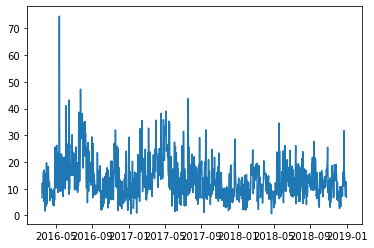

In [11]:
plt.plot(data['DATENEW'], data['UNITS'])

We can see that the data is not stationary, so it needs at least one order of differencing.

In [12]:
#get the train dataset
train = data[['DATENEW', 'UNITS']].set_index('DATENEW')
train.head()

,UNITS
DATENEW,
2016-03-16,6.582
2016-03-17,12.104
2016-03-18,8.496
2016-03-19,9.394
2016-03-20,13.858


In [13]:
#get the test dataset
test = test[['DATENEW', 'UNITS']].set_index('DATENEW')
test.head()

,UNITS
DATENEW,
2019-01-02,15.202
2019-01-03,10.682
2019-01-04,5.164
2019-01-05,16.858
2019-01-06,8.602


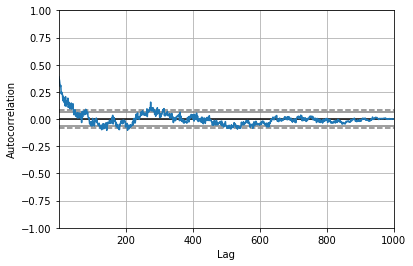

In [14]:
pd.plotting.autocorrelation_plot(train)

We can see that the correlations at all range are pretty small(less than 0.25), so we probably wouldn't need the p value.

In [15]:
model = ARIMA(train, order = (0, 1, 0))
model_fit = model.fit(disp = 0)
print(model_fit.summary())

C:\Users\QYK\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Users\QYK\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


                             ARIMA Model Results                              
Dep. Variable:                D.UNITS   No. Observations:                  999
Model:                 ARIMA(0, 1, 0)   Log Likelihood               -3532.331
Method:                           css   S.D. of innovations              8.306
Date:                Sun, 23 Feb 2020   AIC                           7068.663
Time:                        18:28:33   BIC                           7078.476
Sample:                             1   HQIC                          7072.393
                                                                              
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0002      0.263      0.001      0.999      -0.515       0.515


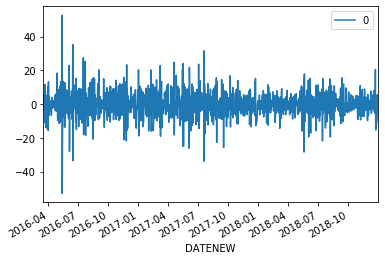

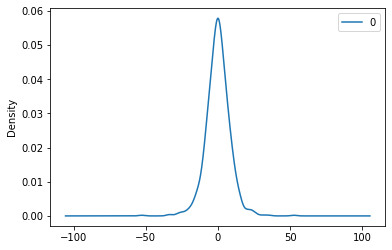

                  0
count  9.990000e+02
mean  -1.275812e-16
std    8.309750e+00
min   -5.287219e+01
25%   -4.662190e+00
50%   -6.419019e-02
75%    4.655810e+00
max    5.256781e+01


In [16]:
#plot the residual errors
residuals = pd.DataFrame(model_fit.resid)
residuals.plot()
plt.show()
residuals.plot(kind='kde')
plt.show()
print(residuals.describe())

In [17]:
train = train.values
test = test.values

The error has a normal distribution and has a mean value very close to 0. Therefore, we can see this model as unbiased.

In [18]:
#prediction
history = [x for x in train]
predictions = []
for t in range(len(test)):
	model = ARIMA(history, order=(7,1,0))
	model_fit = model.fit(disp=0)
	output = model_fit.forecast()
	yhat = output[0]
	predictions.append(yhat)
	obs = test[t]
	history.append(obs)
	print('predicted=%f, expected=%f' % (yhat, obs))
error = rmse = np.sqrt(mean_squared_error(test, predictions))
print('Test RMSE: %.3f' % error)

predicted=11.610250, expected=15.202000
predicted=13.698511, expected=10.682000
predicted=11.430211, expected=5.164000
predicted=9.227458, expected=16.858000
predicted=11.157030, expected=8.602000
predicted=10.003654, expected=13.330000
predicted=11.138558, expected=5.434000
predicted=10.444634, expected=9.862000
predicted=9.712569, expected=5.942000
predicted=8.673176, expected=8.260000
predicted=9.201713, expected=8.818000
predicted=8.675686, expected=7.850000
predicted=8.492660, expected=4.050000
predicted=7.010658, expected=6.006000
predicted=6.882519, expected=1.788000
predicted=5.418317, expected=2.096000
predicted=4.776876, expected=6.314000
predicted=5.101326, expected=18.526000
predicted=7.934934, expected=5.024000
predicted=7.153992, expected=8.950000
predicted=7.731725, expected=5.226000
predicted=6.753730, expected=11.424000
predicted=7.820398, expected=6.172000
predicted=8.394593, expected=8.710000
predicted=9.099319, expected=11.464000
predicted=8.731483, expected=4.33000

predicted=22.588550, expected=11.794000
predicted=21.093879, expected=12.642000
predicted=16.201056, expected=9.068000
predicted=14.314589, expected=6.478000
predicted=9.500474, expected=18.170000
predicted=11.374203, expected=11.176000
predicted=11.691084, expected=8.086000
predicted=10.980078, expected=7.538000
predicted=9.890308, expected=13.572000
predicted=10.541099, expected=8.398000
predicted=10.093077, expected=11.508000
predicted=11.189522, expected=11.556000
predicted=10.729416, expected=8.582000
predicted=9.952920, expected=7.662000
predicted=9.292474, expected=12.398000
predicted=10.434330, expected=11.988000
predicted=10.635391, expected=12.060000
predicted=11.239817, expected=13.896000
predicted=11.853005, expected=14.730000
predicted=12.398020, expected=28.556000
predicted=16.519311, expected=20.812000
predicted=18.401258, expected=23.480000
predicted=19.713175, expected=11.428000
predicted=17.595033, expected=15.170000
predicted=17.005802, expected=14.926000
predicted=1

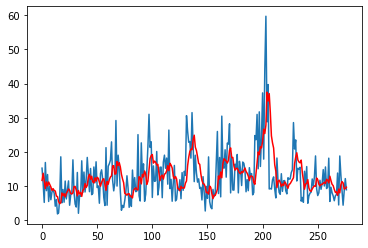

In [19]:
# plot
plt.plot(test)
plt.plot(predictions, color='red')
plt.show()